## Contents

This script is analysing the variables related to subjects and objects of participation, as well as impact. Analysis is descriptive and includes data visualizations. 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

### 1. Importing Data

In [2]:
#creating a path
path= r'C:\Users\isobr\OneDrive\18042023ParticipationPractices'

In [3]:
path

'C:\\Users\\isobr\\OneDrive\\18042023ParticipationPractices'

In [4]:
#importing the excel dataset
df = pd.read_excel(os.path.join(path, 'practices_full.xlsx'), index_col = False)

In [5]:
df.head()

,ID,title,CS,source,year_pub,year_pro,publisher,link,province_state,country,...,innovation,tax,new jobs,tourism,energy price,property price,livelihoods,eco_imp,imp_score,perceived_imp
0,a1,Popular and institutional opposition to the Se...,yes,Wiki,2022,2021.0,EJ Atlas,https://ejatlas.org/conflict/popular-and-insti...,Catalonia,Spain,...,0,0,1,1,0,0,0,2,6,Moderate negative
1,a2,Proteste gegen Verspargelung und Flächenfraß,yes,News media,2019,2019.0,deutschlandfunk Kultur,https://www.deutschlandfunkkultur.de/windenerg...,Mecklenburg-Western Pomerania,Germany,...,0,0,0,0,0,0,0,0,3,Moderate negative
2,a3,Greta Thunberg has joined a protest against wi...,yes,News media,2023,2021.0,CNN,https://edition.cnn.com/2023/03/01/europe/gret...,Fosen,Norway,...,0,0,0,0,0,0,0,0,3,Moderate negative
3,a4,"Combining offshore wind farms, nature conserva...",no,Journal article,2021,2021.0,Marine Policy,https://www.sciencedirect.com/science/article/...,Not Applicable,Netherlands,...,0,0,1,0,0,0,0,1,4,Neutral
4,a5,Learning from the social impacts associated wi...,yes,Journal article,2021,2008.0,Impact Assessment and Project Appraisal,https://www.tandfonline.com/doi/full/10.1080/1...,Urk,Netherlands,...,1,0,0,1,0,0,1,3,6,Moderate negative


In [6]:
df.shape

(397, 70)

In [7]:
df.columns

Index(['ID', 'title', 'CS', 'source', 'year_pub', 'year_pro', 'publisher',
       'link', 'province_state', 'country', 'region', 'technology',
       'n_turbines', 'capacity', 'local community', 'communities interest',
       'public', 'small investors', 'cooperative', 'NGO', 'organisation',
       'government', 'municipality', 'experts', 'investors', 'turbines',
       'onshore farm', 'offshore farm', 'company', 'policy', 'community ',
       'repowering', 'other', 'mandate', 'main_level', 'level_score',
       'other_levels', 'alibi', 'resistance', 'information', 'consultation ',
       'financial ', 'cooperation ', 'scale', 'timing', 'opportunities',
       'opportunities_score', 'noise', 'shadow-flicker', 'safety', 'health',
       'landuse', 'access energy', 'awareness', 'community fund', 'soc_imp',
       'emissions', 'biodiversity', 'landscape', 'env_imp', 'innovation',
       'tax', 'new jobs', 'tourism', 'energy price', 'property price',
       'livelihoods', 'eco_imp', 'imp_s

### 2. Subsetting data 

In [8]:
sub=['local community', 'communities interest',
       'public', 'small investors', 'cooperative', 'NGO', 'organisation',
       'government', 'municipality', 'experts', 'investors']

In [9]:
obj=['turbines','onshore farm', 'offshore farm', 'company', 'policy', 'community ',
     'repowering', 'other']

In [10]:
soimps=['noise', 'shadow-flicker', 'safety', 'health',
       'landuse', 'access energy', 'awareness', 'community fund']

In [11]:
enimps=['emissions', 'biodiversity', 'landscape']

In [12]:
ecimps=['innovation','tax', 'new jobs', 'tourism', 'energy price', 'property price',
       'livelihoods']

##### 2.1 Subjects of Participation

In [13]:
subjects=df[sub]

In [14]:
subjects.head()

,local community,communities interest,public,small investors,cooperative,NGO,organisation,government,municipality,experts,investors
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,1,1,1,1,1
4,0,0,0,0,0,1,0,0,0,0,0


In [15]:
# This command turns the dummy data from the states columns into a categorical variable in s2, which is a pandas Series data structure
s2 = subjects.idxmax(axis=1)

In [16]:
s2

0           local community
1           local community
2           local community
3      communities interest
4                       NGO
               ...         
392         local community
393         local community
394         local community
395         local community
396         local community
Length: 397, dtype: object

In [17]:
s2.value_counts(dropna=False)

local community         225
communities interest     44
public                   41
cooperative              29
municipality             16
small investors           9
government                9
NGO                       6
experts                   6
organisation              6
investors                 6
dtype: int64

For data visualizations, using the same palette from coloors for colors: https://coolors.co/palette/264653-2a9d8f-e9c46a-f4a261-e76f51

Text(0.5, 1.0, 'Main Subjects of Participation')

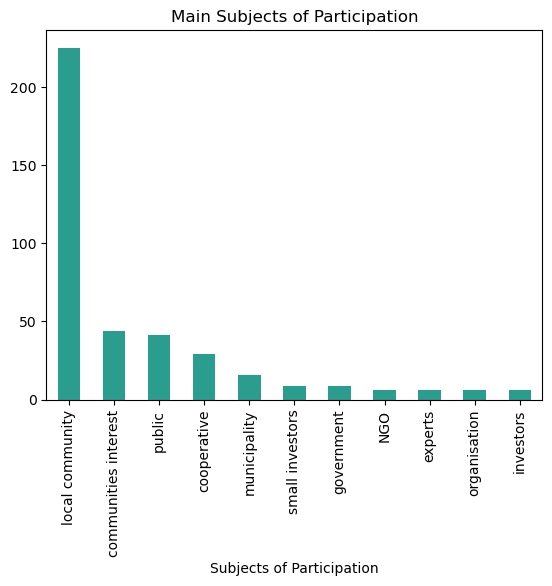

In [18]:
s2.value_counts().plot.bar(color=['#2A9D8F'])
plt.xlabel("Subjects of Participation", fontsize=10)
plt.title('Main Subjects of Participation')

#### 2.2 Objects of Participation

In [19]:
objects=df[obj]

In [20]:
objects.head()

,turbines,onshore farm,offshore farm,company,policy,community,repowering,other
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0
4,0,0,0,0,0,1,0,0


In [21]:
o2 = objects.idxmax(axis=1)

In [22]:
o2

0       onshore farm
1         repowering
2       onshore farm
3      offshore farm
4         community 
           ...      
392     onshore farm
393     onshore farm
394         turbines
395         turbines
396     onshore farm
Length: 397, dtype: object

In [23]:
o2.value_counts(dropna=False)

onshore farm     163
turbines         120
offshore farm     54
policy            35
community          7
company            7
other              6
repowering         5
dtype: int64

Text(0.5, 1.0, 'Main Objects of Participation')

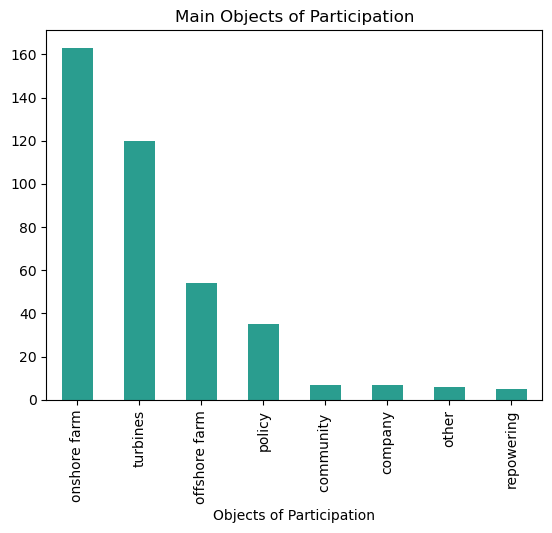

In [24]:
o2.value_counts().plot.bar(color='#2a9d8f')
plt.xlabel("Objects of Participation", fontsize=10)
plt.title('Main Objects of Participation')

#### 2.3 Analysis of Impacts

In [25]:
#doing the same for social impacts
sociali=df[soimps]

In [26]:
sociali.head()

,noise,shadow-flicker,safety,health,landuse,access energy,awareness,community fund
0,1,0,0,1,1,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0


In [27]:
a2 = sociali.idxmax(axis=1)

In [28]:
a2

0               noise
1      shadow-flicker
2             landuse
3               noise
4             landuse
            ...      
392    community fund
393     access energy
394             noise
395     access energy
396           landuse
Length: 397, dtype: object

In [29]:
a2.value_counts(dropna=False)

noise             174
awareness          77
landuse            53
access energy      37
community fund     30
health             13
safety              7
shadow-flicker      6
dtype: int64

Text(0.5, 1.0, 'Main Social Impacts of Projects')

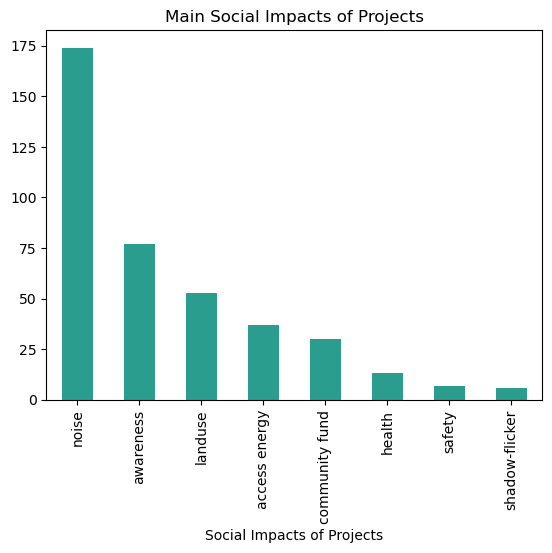

In [30]:
a2.value_counts().plot.bar(color='#2a9d8f')
plt.xlabel("Social Impacts of Projects", fontsize=10)
plt.title('Main Social Impacts of Projects')

In [31]:
#the same for environmental impacts
envi=df[enimps]

In [32]:
envi.head()

,emissions,biodiversity,landscape
0,0,1,0
1,0,1,1
2,0,1,1
3,1,1,1
4,0,1,1


In [33]:
#create new series
e2 = envi.idxmax(axis=1)

In [34]:
e2

0      biodiversity
1      biodiversity
2      biodiversity
3         emissions
4      biodiversity
           ...     
392       emissions
393       emissions
394       emissions
395       emissions
396    biodiversity
Length: 397, dtype: object

In [35]:
e2.value_counts(dropna=False)

emissions       301
biodiversity     67
landscape        29
dtype: int64

Text(0.5, 1.0, 'Main Environmental Impacts of Projects')

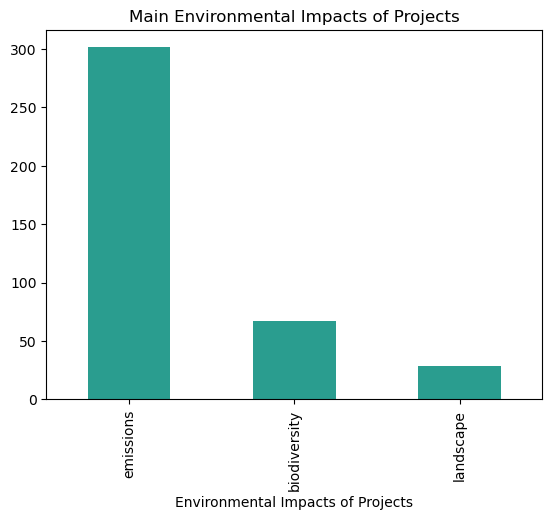

In [36]:
e2.value_counts().plot.bar(color='#2a9d8f')
plt.xlabel("Environmental Impacts of Projects", fontsize=10)
plt.title('Main Environmental Impacts of Projects')

In [37]:
#lastly, the same for the economic impacts
ecoi=df[ecimps]

In [38]:
ecoi.head()

,innovation,tax,new jobs,tourism,energy price,property price,livelihoods
0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,1,0,0,1,0,0,1


In [39]:
#create new series
e3 = ecoi.idxmax(axis=1)

In [40]:
e3

0        new jobs
1      innovation
2      innovation
3        new jobs
4      innovation
          ...    
392    innovation
393    innovation
394    innovation
395    innovation
396      new jobs
Length: 397, dtype: object

In [41]:
e3.value_counts(dropna=False)

innovation        212
new jobs           70
energy price       41
livelihoods        30
tax                19
tourism            14
property price     11
dtype: int64

Text(0.5, 1.0, 'Main Economic Impacts of Projects')

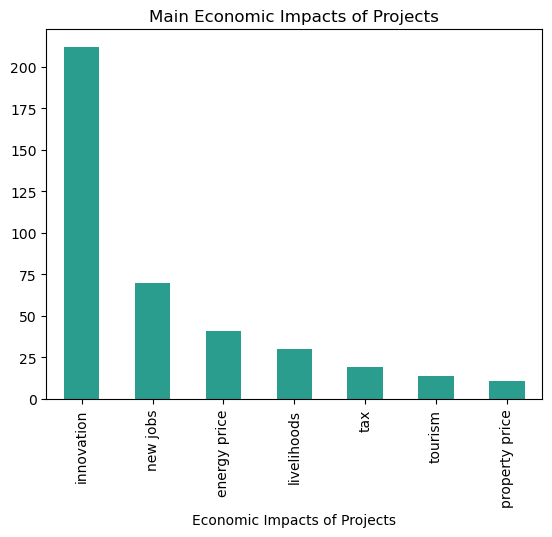

In [42]:
e3.value_counts().plot.bar(color='#2a9d8f')
plt.xlabel("Economic Impacts of Projects", fontsize=10)
plt.title('Main Economic Impacts of Projects')

In [43]:
df.columns

Index(['ID', 'title', 'CS', 'source', 'year_pub', 'year_pro', 'publisher',
       'link', 'province_state', 'country', 'region', 'technology',
       'n_turbines', 'capacity', 'local community', 'communities interest',
       'public', 'small investors', 'cooperative', 'NGO', 'organisation',
       'government', 'municipality', 'experts', 'investors', 'turbines',
       'onshore farm', 'offshore farm', 'company', 'policy', 'community ',
       'repowering', 'other', 'mandate', 'main_level', 'level_score',
       'other_levels', 'alibi', 'resistance', 'information', 'consultation ',
       'financial ', 'cooperation ', 'scale', 'timing', 'opportunities',
       'opportunities_score', 'noise', 'shadow-flicker', 'safety', 'health',
       'landuse', 'access energy', 'awareness', 'community fund', 'soc_imp',
       'emissions', 'biodiversity', 'landscape', 'env_imp', 'innovation',
       'tax', 'new jobs', 'tourism', 'energy price', 'property price',
       'livelihoods', 'eco_imp', 'imp_s

Text(0.5, 1.0, 'Perceived Impacts of Projects')

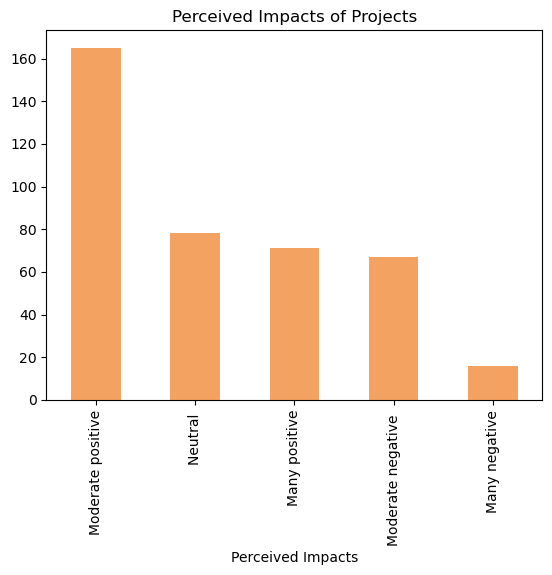

In [44]:
df['perceived_imp'].value_counts().plot.bar(color='#F4A261')
plt.xlabel("Perceived Impacts", fontsize=10)
plt.title('Perceived Impacts of Projects')

In [45]:
#create a pivot table to compare perceived impacts with main level of participation 
df2 = df.pivot_table(index = 'perceived_imp', columns = 'main_level' , values = 'level_score')
df2

main_level,Alibi,Consultation,Cooperation,Financial,Information,No participation,Resistance
perceived_imp,,,,,,,
Many negative,1.0,4.0,NaN,NaN,3.0,0.0,2.0
Many positive,NaN,4.0,6.0,5.0,3.0,0.0,NaN
Moderate negative,NaN,4.0,6.0,5.0,3.0,0.0,2.0
Moderate positive,1.0,4.0,6.0,5.0,3.0,0.0,2.0
Neutral,1.0,4.0,6.0,5.0,3.0,0.0,2.0


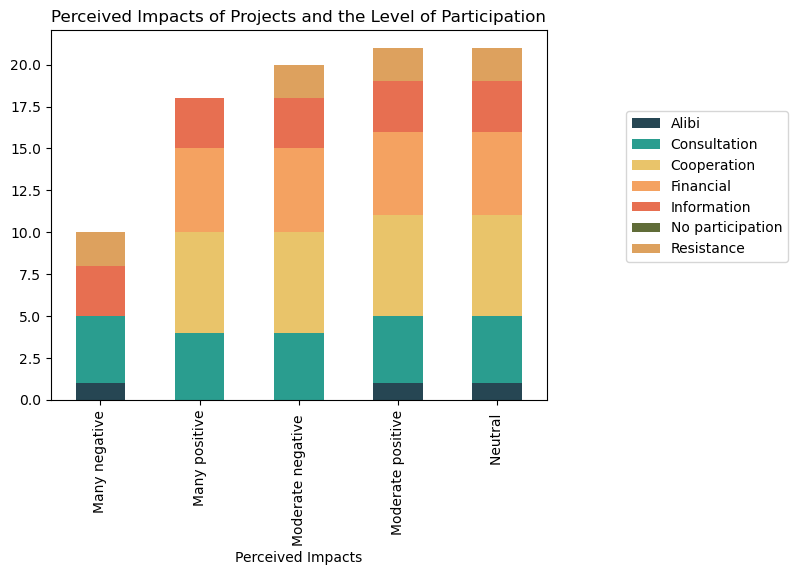

In [46]:
bar_df2 = df2. plot(kind= 'bar', stacked = True, color=['#264653','#2A9D8F','#E9C46A','#F4A261','#E76F51','#606c38','#dda15e'])
plt.xlabel("Perceived Impacts", fontsize=10)
plt.title('Perceived Impacts of Projects and the Level of Participation')
bar_df2.legend(loc='upper right', bbox_to_anchor=(1.5, 0.8), ncol=1)
#plt.legend(bbox_to_anchor=([0.55, 1, 0, 0]), ncol=5, frameon=False)
width = 0.90

In [47]:
#comparing perceived impacts and mandates for participation
df3 = df.pivot_table(index = 'perceived_imp', columns = 'mandate' , values = 'imp_score')
df3

mandate,Legal Obligation,Not applicable,Voluntary
perceived_imp,,,
Many negative,2.000000,2.000000,2.800000
Many positive,5.750000,4.000000,4.087719
Moderate negative,4.470588,5.166667,3.431818
Moderate positive,3.647059,4.450000,3.540541
Neutral,3.823529,3.111111,2.576923


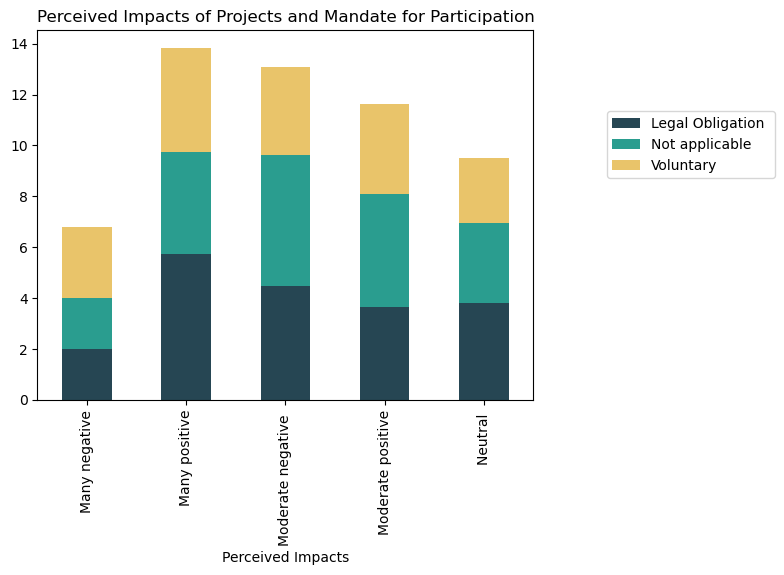

In [48]:
bar_df3 = df3. plot(kind= 'bar', stacked = True, color=['#264653','#2A9D8F','#E9C46A'])
plt.xlabel("Perceived Impacts", fontsize=10)
plt.title('Perceived Impacts of Projects and Mandate for Participation')
bar_df3.legend(loc='upper right', bbox_to_anchor=(1.5, 0.8), ncol=1)
#plt.legend(bbox_to_anchor=([0.55, 1, 0, 0]), ncol=5, frameon=False)
width = 0.90